## Using predefined components with pyOpTools

Starting from surfaces to create components to define optical systems to run a simulation, can be very time consumming, for this reason pyOpTools has a growing library of [predefined components](../../pyoptools.raytrace.comp_lib.rst). Some of these components, as well as some simple examples on how to use them to run simulation will be shown below.


In [2]:
from pyoptools.all import *

Loading component library Edmund  from files  ['/usr/lib/python3/dist-packages/pyoptools/raytrace/library/Edmund/edmund_spherical.cmp']
Loading component library Thorlabs  from files  ['/usr/lib/python3/dist-packages/pyoptools/raytrace/library/Thorlabs/thorlabs_spherical.cmp']
Loading component library Thorlabs  from files  ['/home/richi/.pyoptools/library/Thorlabs/SphOptics1.cmp']


### Spherical lens

The most common optical systems are composed by spherical lenses, so pyOpTools have a [SphericalLens](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.SphericalLens) helper class to create round-shaped sprerical lenses. 

In this example a bi-convex lens with a diameter of 50mm (r=25mm) wil be created. The curvature in both surfaces will be 1/100mm and the thickness at the center of the lens will be 10mm. The material used to simulate the lens is BK7 from the schoot catalog.

Using this lens a [System](../../pyoptools.raytrace.system.system.rst#pyoptools.raytrace.system.system.System) is created. The position of the lens (the mid-point between the vertexes) is the (0,0,100) coordinate. No rotation of the lens is made.

After the system is ready, a list of rays that will be propagated must be defined. In this example a list **R**, containing 5 rays is created. The origin of such [Rays](../pyoptools.raytrace.ray.ray.rst#pyoptools.raytrace.ray.ray.Ray) is defined as the coordinate (0,0,0). Each one has a different direction vector to create something similar to a point source located at the origin and aiming to the lens. The wavelenght for all rays is defined as 650nm.

<div class="alert alert-info">
    
**Note:** In pyOpTools the wavelenghts are defined in microns.

</div>

After the system and the ray beam are created, the later is added to the former, and the propagation calculation is performed.

The last [Plot3d](pyoptools.gui.ipywidgets.rst#pyoptools.gui.ipywidgets.Plot3D) command creates an interactive 3D plot of the system and the propagated rays.

In [8]:
L1=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,
                thickness=10,material=material.schott["BK7"])

S=System(complist=[(L1,(0,0,100),(0,0,0))],n=1)
R=[Ray(pos=(0,0,0),dir=(0,.2,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,-.2,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(.2,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(-.2,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,0,1),wavelength=.650)]
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(300,100),scale=2,rot=[(0,-pi/2,0),(pi/20,-pi/10,0)])

Renderer(camera=OrthographicCamera(bottom=-100.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

Besides the SphericalLens, pyOptools has classes to create the following lenses:
    
- [Doublet](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.Doublet)
- [AirSpacedDoublet](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.AirSpacedDoublet)
- [CylindricalLens](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.CylindricalLens)
- [IdealLens](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.IdealLens)
- [IdealTLens](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.IdealTLens)
- [PowellLens](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.PowellLens)

### CCD

Most of the time it is needed a way to get information, such a spot diagram at a certain place in the system after running a simulation. pyOpTools define the [CCD](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.CCD) component for this task. Its main use is to capture ray information ar a given place in the optical system. Several CCD instances can be used in the same setup.

In the next example a system made up from a CCD with a size of 10mm X 10 mm and an spherical lens will be created and simulated:


In [9]:
L1=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
SEN1=CCD(size=(10,10))
S=System(complist=[(L1,(0,0,200),(0,0,0)),
                   (SEN1,(0,0,400),(0,0,0))],n=1)
R=[Ray(pos=(0,0,0),dir=(0,.1,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,-.1,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(.1,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(-.1,0,1),wavelength=.650),
   Ray(pos=(0,0,0),dir=(0,0,1),wavelength=.650)]
S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,200),size=(450,100),scale=2,rot=[(0,-pi/2,0),(pi/20,-pi/10,0)])

Renderer(camera=OrthographicCamera(bottom=-100.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

After the rays propagation is finished, it is possible to plot the spot diagram of the CCD. In this case it can be seen that the CCD is not located close to the image plane.

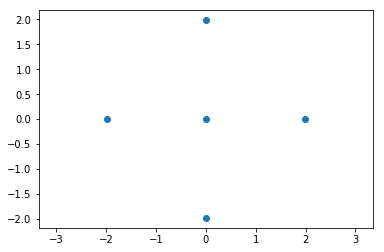

In [11]:
spot_diagram(SEN1)

The sensor has an attribute called [hit_list](../../pyoptools.raytrace.comp_lib.rst#pyoptools.raytrace.comp_lib.CCD.hit_list). This is a list containing a set of tuples with the coordinates of each hit point, and the ray that hitted at this point. In the following example, the coordinates of the hit point is printed:

In [13]:
for C,R in SEN1.hit_list:
    print(C)

[ 0.         -1.98343271  0.        ]
[0.         1.98343271 0.        ]
[-1.98343271  0.          0.        ]
[1.98343271 0.         0.        ]
[0. 0. 0.]


In [ ]:
Stop()1

In [ ]:
Block()

In [ ]:
RightAnglePrism()

In [ ]:
BeamSplitingCube()

# Catalogos de materiales predefinidos

In [ ]:
from pyoptools.raytrace.mat_lib.material import liblist
for lib,mat in liblist: 
    print(lib)

In [ ]:
material.schott.keys()

# Catalogo de lentes predefinidas

In [ ]:
for i in library.Edmund.parts():
    try:
        a=library.Edmund.get(i)
        print(type(a))
    except:
        pass